Training shape: (48830, 50, 10), Validation shape: (12208, 50, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 50, 64)              │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,706 (252.76 KB)

 Trainable params: 64,706 (252.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5295 - loss: 0.6925 - val_accuracy: 0.5298 - val_loss: 0.6912
Epoch 2/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5360 - loss: 0.6905 - val_accuracy: 0.5333 - val_loss: 0.6905
Epoch 3/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5333 - loss: 0.6907 - val_accuracy: 0.5333 - val_loss: 0.6907
Epoch 4/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5343 - loss: 0.6907 - val_accuracy: 0.5333 - val_loss: 0.6905
Epoch 5/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5385 - loss: 0.6902 - val_accuracy: 0.5307 - val_loss: 0.6905
Epoch 6/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5360 - loss: 0.6903 - val_accuracy: 0.5342 - val_loss: 0.6903
Epoch 7/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5381 - loss: 0.6903 - val_accuracy: 0.5334 - val_loss: 0.6902
Epoch 8/20
763/763 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5382 - loss: 0.6902 - v

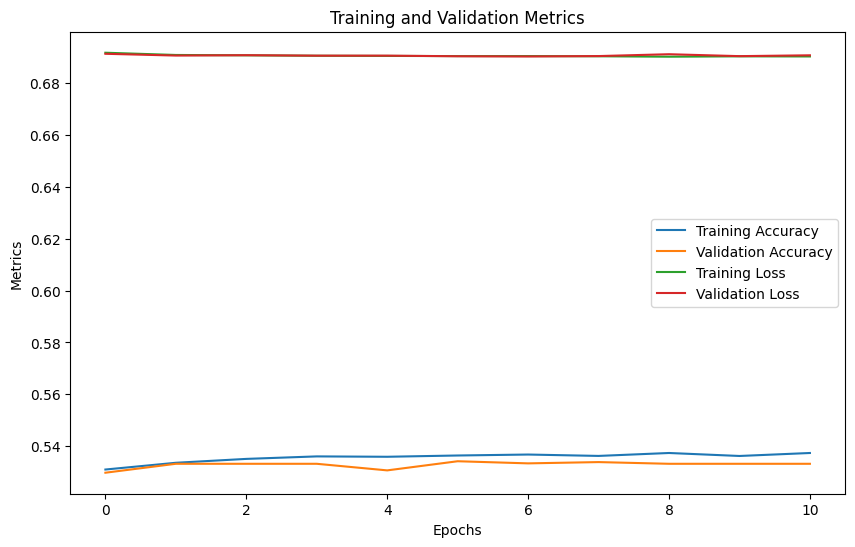

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predictions: [1 1 1 1 1]
True Classes: [1 1 1 0 0]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load your dataset (replace with your file or DataFrame)
file_path = '../data/processed/indexData_processed.csv'
df  = pd.read_csv(file_path)

# Select features and target
features = ['adj close', 'volume','ma_5', 'ma_10', 'ma_30', 'volatility', 'macd', 'rsi_12', 'close_5_sma', 'close_10_ema']
X = df[features]
y = df['price_direction']

# # Ensure your dataset has the required columns
# features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
# target = 'Close'

# # Create a binary target variable (1: Increase, 0: Decrease)
# data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
# data = data.dropna()  # Remove rows with NaN values

# # Extract features and target
# X = data[features].values
# y = data['Target'].values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create sequences
SEQ_LENGTH = 50  # Number of days in each sequence
X_seq, y_seq = [], []

for i in range(len(X) - SEQ_LENGTH):
    X_seq.append(X[i:i+SEQ_LENGTH])
    y_seq.append(y[i+SEQ_LENGTH])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Convert y to categorical (for binary classification)
y_seq = to_categorical(y_seq, num_classes=2)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}, Validation shape: {X_val.shape}")

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_seq.shape[2])),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model with learning rate adjustments
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # Adjust epochs as needed
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Training and Validation Metrics")
plt.legend()
plt.show()

# Predict on a new batch of data
predictions = model.predict(X_val[:5])
predicted_classes = np.argmax(predictions, axis=1)

print(f"Predictions: {predicted_classes}")
print(f"True Classes: {np.argmax(y_val[:5], axis=1)}")